# Imports

In [19]:
from datasets.preparer import *

In [20]:
class Args:
    def __init__(self, dataset, dataset_path, epochs, features, agents, frames, batch_size, reg, dropout, learning_rate,
                 gmitre_calc, min_samples, max_samples):
        self.dataset = dataset
        self.dataset_path = dataset_path
        self.epochs = epochs
        self.features = features
        self.agents = agents
        self.frames = frames
        self.batch_size = batch_size
        self.reg = reg
        self.dropout = dropout
        self.learning_rate = learning_rate
        self.gmitre_calc = gmitre_calc
        self.min_samples = min_samples
        self.max_samples = max_samples


# Datasets stats

In [21]:
datasets_dict = {
    # 'eth': dataset_data('./ETH/seq_eth'),
    # 'hotel': dataset_data('./ETH/seq_hotel'),
    # 'zara01': dataset_data('./UCY/zara01'),
    # 'zara02': dataset_data('./UCY/zara02'),
    # 'students03': dataset_data('./UCY/students03'),
    'sim_3': dataset_data('./simulation/sim_3', sim=True)
}

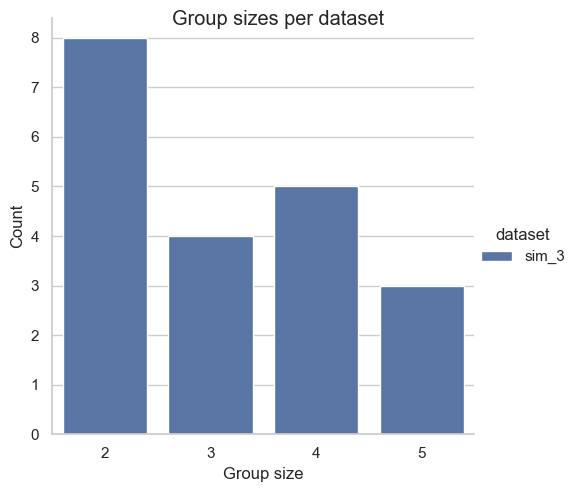

In [22]:
groups_dict = {
    # 'eth': read_groups('./ETH/seq_eth'),
    # 'hotel': read_groups('./ETH/seq_hotel'),
    # 'zara01': read_groups('./UCY/zara01'),
    # 'zara02': read_groups('./UCY/zara02'),
    # 'students03': read_groups('./UCY/students03'),
    'sim_3': read_groups('./simulation/sim_3', sim=True)
}
groups_size_hist(groups_dict, './group_size_plot.png')

In [23]:
stats_df = pd.DataFrame.from_dict(datasets_dict, orient='index')
stats_df['groups'] = stats_df['groups'].str.len()
stats_df.drop(columns=['df'])

,groups,agents,frames,single agent groups,difference,duration
sim_3,20,63,550,0,1,549.0


In [48]:
args = Args(
    dataset='eth',
    dataset_path='./datasets/ETH/seq_eth',
    epochs=50,
    features=4,
    agents=6,
    frames=1,
    batch_size=1024,
    reg=0.0000001,
    dropout=0.35,
    learning_rate=0.0001,
    gmitre_calc=True,
    min_samples=10,
    max_samples=100
)

In [49]:
dataset_scenes = {}
size = {}
steps = {
    'sim_3': 3
}
min_samples = {
    'sim_3': 10
}
max_samples = {
    'sim_3': 1000
}
for dataset in datasets_dict.keys():
    df = datasets_dict[dataset]['df']
    groups = datasets_dict[dataset]['groups']
    group_pairs = get_group_pairs(groups)
    difference = datasets_dict[dataset]['difference']

    # remove agents with low number of frames or agents
    # df = remove_agents_and_frames_with_insufficient_data(dataframe=df, frames_threshold=args.frames,
    #                                                      agents_threshold=args.agents)

    # get frame combinations data
    scenes = get_scene_data(dataframe=df, agents_minimum=args.agents,
                            consecutive_frames=args.frames, difference_between_frames=difference,
                            groups=groups, step=steps[dataset])

    dataset_scenes[dataset] = scenes
    size[dataset] = dataset_size_calculator(group_pairs=group_pairs, scene_data=scenes, agents_minimum=args.agents,
                                            min_pair_samples=min_samples[dataset],
                                            max_pair_samples=max_samples[dataset])

In [50]:
for dataset, scenes in dataset_scenes.items():
    print('dataset: {}, combinations: {}'.format(dataset, len(scenes)))

dataset: sim_3, combinations: 183


In [51]:
for dataset, samples in size.items():
    print('dataset: {}, samples: {}'.format(dataset, samples))

dataset: sim_3, samples: 187142
